In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import statistics as st
import arviz as az
import bambi as bmb
import pymc as pm
from pymc import HalfNormal, Model, Normal, sample
import statsmodels.api as sm
import networkx as nx
import graphviz
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 12345
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

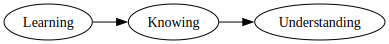

In [3]:
f = graphviz.Digraph()

# Definizione dei nodi e degli archi
f.edge("Learning", "Knowing")
f.edge("Knowing", "Understanding")

# Impostazione dell'orientamento orizzontale
f.attr(rankdir='LR')
f

In [4]:
n = 1000  # sample size

# Simulating the variables
X = np.random.normal(0, 1, n)  # Learning
C = 5 * X + np.random.normal(0, 1, n)  # Knowing
Y = 3 * C + np.random.normal(0, 1, n)  # Understanding

df = pd.DataFrame()
df["X"] = X
df["C"] = C
df["Y"] = Y

df.head()


,X,C,Y
0,0.460425,2.695892,8.538998
1,1.045135,6.021211,16.730789
2,0.677054,4.770374,14.192734
3,0.929045,3.745468,10.521586
4,-0.640788,-2.930111,-7.788531


In [5]:
mod1 = bmb.Model("Y ~ X", df)
results1 = mod1.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:02.479418


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1311.34it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1311.94it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1312.98it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1313.84it/s]


Sampling time = 0:00:01.872275


Transforming variables...


Transformation time = 0:00:00.076812


Computing Log Likelihood...


Log Likelihood time = 0:00:00.156763


In [6]:
az.summary(results1, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.06,0.10,-0.25,0.13,0.0,0.0,3920.27,2843.19,1.0
X,14.98,0.10,14.80,15.16,0.0,0.0,3828.97,2989.48,1.0
Y_sigma,3.19,0.07,3.05,3.32,0.0,0.0,4664.22,3212.70,1.0


In [7]:
mod2 = bmb.Model("Y ~ X + C", df)

In [8]:
results2 = mod2.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.923050


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:  45%|███████████████████████▊                             | 900/2000 [00:01<00:00, 8749.01it/s]

Running chain 2:  45%|███████████████████████▊                             | 900/2000 [00:01<00:00, 8499.48it/s]

Running chain 0:  50%|██████████████████████████                          | 1000/2000 [00:01<00:00, 9328.88it/s]

Running chain 3:  50%|██████████████████████████                          | 1000/2000 [00:01<00:00, 8974.00it/s]

Running chain 1:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 8807.57it/s]

Running chain 0:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 8552.72it/s]

Running chain 2:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:01<00:00, 9142.81it/s]

Running chain 3:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 8298.97it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1234.37it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1235.52it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1236.45it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1237.31it/s]


Sampling time = 0:00:01.697810


Transforming variables...


Transformation time = 0:00:00.048202


Computing Log Likelihood...


Log Likelihood time = 0:00:00.123974


In [9]:
az.summary(results2, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.02,0.03,-0.08,0.04,0.0,0.0,2459.08,2005.81,1.0
X,-0.33,0.17,-0.64,-0.02,0.0,0.0,1724.86,1668.67,1.0
C,3.07,0.03,3.01,3.13,0.0,0.0,1725.90,1641.69,1.0
Y_sigma,1.02,0.02,0.98,1.06,0.0,0.0,2671.77,2271.54,1.0


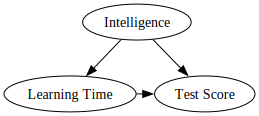

In [10]:
f = graphviz.Digraph()
with f.subgraph() as s:
    s.attr(rank='same')
    s.node("Learning Time")
    s.node("Test Score")

f.node("Intelligence")
f.edge("Intelligence", "Learning Time")
f.edge("Intelligence", "Test Score")
f.edge("Learning Time", "Test Score")

f

In [11]:
n = 1000  # sample size

# Simulating the variables
I = np.random.normal(100, 15, n)  # Intelligence
T = 200 - I + np.random.normal(0, 1, n)  # Learning Time
S = 0.5 * I + 0.1 * T + np.random.normal(0, 1, n)  # Test Score

df = pd.DataFrame()
df["I"] = I
df["T"] = T
df["S"] = S

df.head()

,I,T,S
0,91.538269,108.906408,56.674707
1,119.841698,80.559643,69.335790
2,110.771394,90.059879,65.094615
3,108.153186,91.598593,63.246339
4,106.607634,93.644346,62.357981


In [12]:
mod3 = bmb.Model("S ~ T", df)
results3 = mod3.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.895842


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1473.93it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1474.89it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1476.23it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1477.58it/s]


Sampling time = 0:00:01.430624


Transforming variables...


Transformation time = 0:00:00.041602


Computing Log Likelihood...


Log Likelihood time = 0:00:00.112489


In [13]:
az.summary(results3, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,99.73,0.23,99.31,100.18,0.0,0.0,4384.20,2679.31,1.0
T,-0.40,0.00,-0.40,-0.39,0.0,0.0,4560.40,2725.54,1.0
S_sigma,1.10,0.02,1.06,1.15,0.0,0.0,2889.06,2511.11,1.0


In [14]:
mod4 = bmb.Model("S ~ T + I", df)
results4 = mod4.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.804316


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:  15%|███████▉                                             | 300/2000 [00:01<00:00, 2983.95it/s]

Running chain 3:  15%|███████▉                                             | 300/2000 [00:01<00:00, 2930.89it/s]

Running chain 1:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3613.66it/s]

Running chain 0:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3537.20it/s]

Running chain 3:  30%|███████████████▉                                     | 600/2000 [00:01<00:00, 2966.92it/s]

Running chain 1:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 3729.02it/s]

Running chain 2:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 3779.10it/s]

Running chain 0:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 3553.95it/s]

Running chain 3:  50%|██████████████████████████                          | 1000/2000 [00:01<00:00, 3318.40it/s]

Running chain 1:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 3779.58it/s]

Running chain 2:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 3765.77it/s]

Running chain 0:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 3593.53it/s]

Running chain 1:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 3744.23it/s]

Running chain 3:  70%|████████████████████████████████████▍               | 1400/2000 [00:01<00:00, 3264.51it/s]

Running chain 2:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 3686.76it/s]

Running chain 0:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 3686.38it/s]

Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 3735.86it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 3755.99it/s]

Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 3677.19it/s]

Running chain 3:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 3369.69it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1021.90it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1022.44it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1023.11it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1023.70it/s]


Sampling time = 0:00:02.035882


Transforming variables...


Transformation time = 0:00:00.048371


Computing Log Likelihood...


Log Likelihood time = 0:00:00.122740


In [15]:
az.summary(results4, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,3.88,6.59,-8.73,15.87,0.19,0.14,1192.15,1308.59,1.0
T,0.08,0.03,0.02,0.14,0.00,0.00,1192.50,1336.30,1.0
I,0.48,0.03,0.42,0.54,0.00,0.00,1197.67,1368.87,1.0
S_sigma,1.00,0.02,0.96,1.04,0.00,0.00,2501.50,1912.25,1.0


In [16]:
n = 1000  # Sample Size
network = np.random.normal(size=n)
competence = np.random.normal(size=n)

promotion = ((network > 1) | (competence > 1)).astype(int)
luck = np.random.binomial(1, 0.05, size=n)
promotion = (1 - luck) * promotion + luck * (1 - promotion)

df = pd.DataFrame()
df["P"] = promotion
df["N"] = network
df["C"] = competence

df.head()

,P,N,C
0,1,0.942842,0.056464
1,0,0.042469,-0.896293
2,0,0.632313,-0.141821
3,1,2.039198,-1.666334
4,1,1.726136,-1.128739


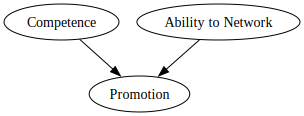

In [17]:
f = graphviz.Digraph()
f.edge("Competence", "Promotion")
f.edge("Ability to Network", "Promotion")
f

In [18]:
mod5 = bmb.Model("C ~ N", df)
results5 = mod5.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.796377


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1574.84it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1576.02it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1577.70it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1579.15it/s]


Sampling time = 0:00:01.483967


Transforming variables...


Transformation time = 0:00:00.038720


Computing Log Likelihood...


Log Likelihood time = 0:00:00.104257


In [19]:
az.summary(results5, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.02,0.03,-0.04,0.08,0.0,0.0,3610.54,2793.38,1.0
N,0.01,0.03,-0.05,0.07,0.0,0.0,4256.62,3156.04,1.0
C_sigma,1.01,0.02,0.97,1.06,0.0,0.0,3913.82,2902.13,1.0


In [20]:
mod6 = bmb.Model("C ~ N + P", df)
results6 = mod6.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.672507


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1460.25it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1461.13it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1462.32it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1463.57it/s]


Sampling time = 0:00:01.443967


Transforming variables...


Transformation time = 0:00:00.043551


Computing Log Likelihood...


Log Likelihood time = 0:00:00.110666


In [21]:
az.summary(results6, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.32,0.04,-0.39,-0.25,0.0,0.0,4158.47,3240.83,1.0
N,-0.16,0.03,-0.22,-0.10,0.0,0.0,3851.73,3131.26,1.0
P,1.01,0.07,0.89,1.14,0.0,0.0,3713.17,3166.68,1.0
C_sigma,0.91,0.02,0.87,0.95,0.0,0.0,3976.26,3078.26,1.0


In [22]:
only_promoted = df.loc[df["P"] == 1]

In [23]:
mod7 = bmb.Model("C ~ N", only_promoted)
results7 = mod7.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.872233


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1638.04it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1639.19it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1640.70it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1642.24it/s]


Sampling time = 0:00:01.290457


Transforming variables...


Transformation time = 0:00:00.038613


Computing Log Likelihood...


Log Likelihood time = 0:00:00.110508


In [24]:
az.summary(results7, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.80,0.06,0.69,0.92,0.0,0.0,4389.74,3136.98,1.0
N,-0.38,0.05,-0.48,-0.29,0.0,0.0,4431.16,3229.75,1.0
C_sigma,1.05,0.04,0.98,1.13,0.0,0.0,4854.22,2969.84,1.0


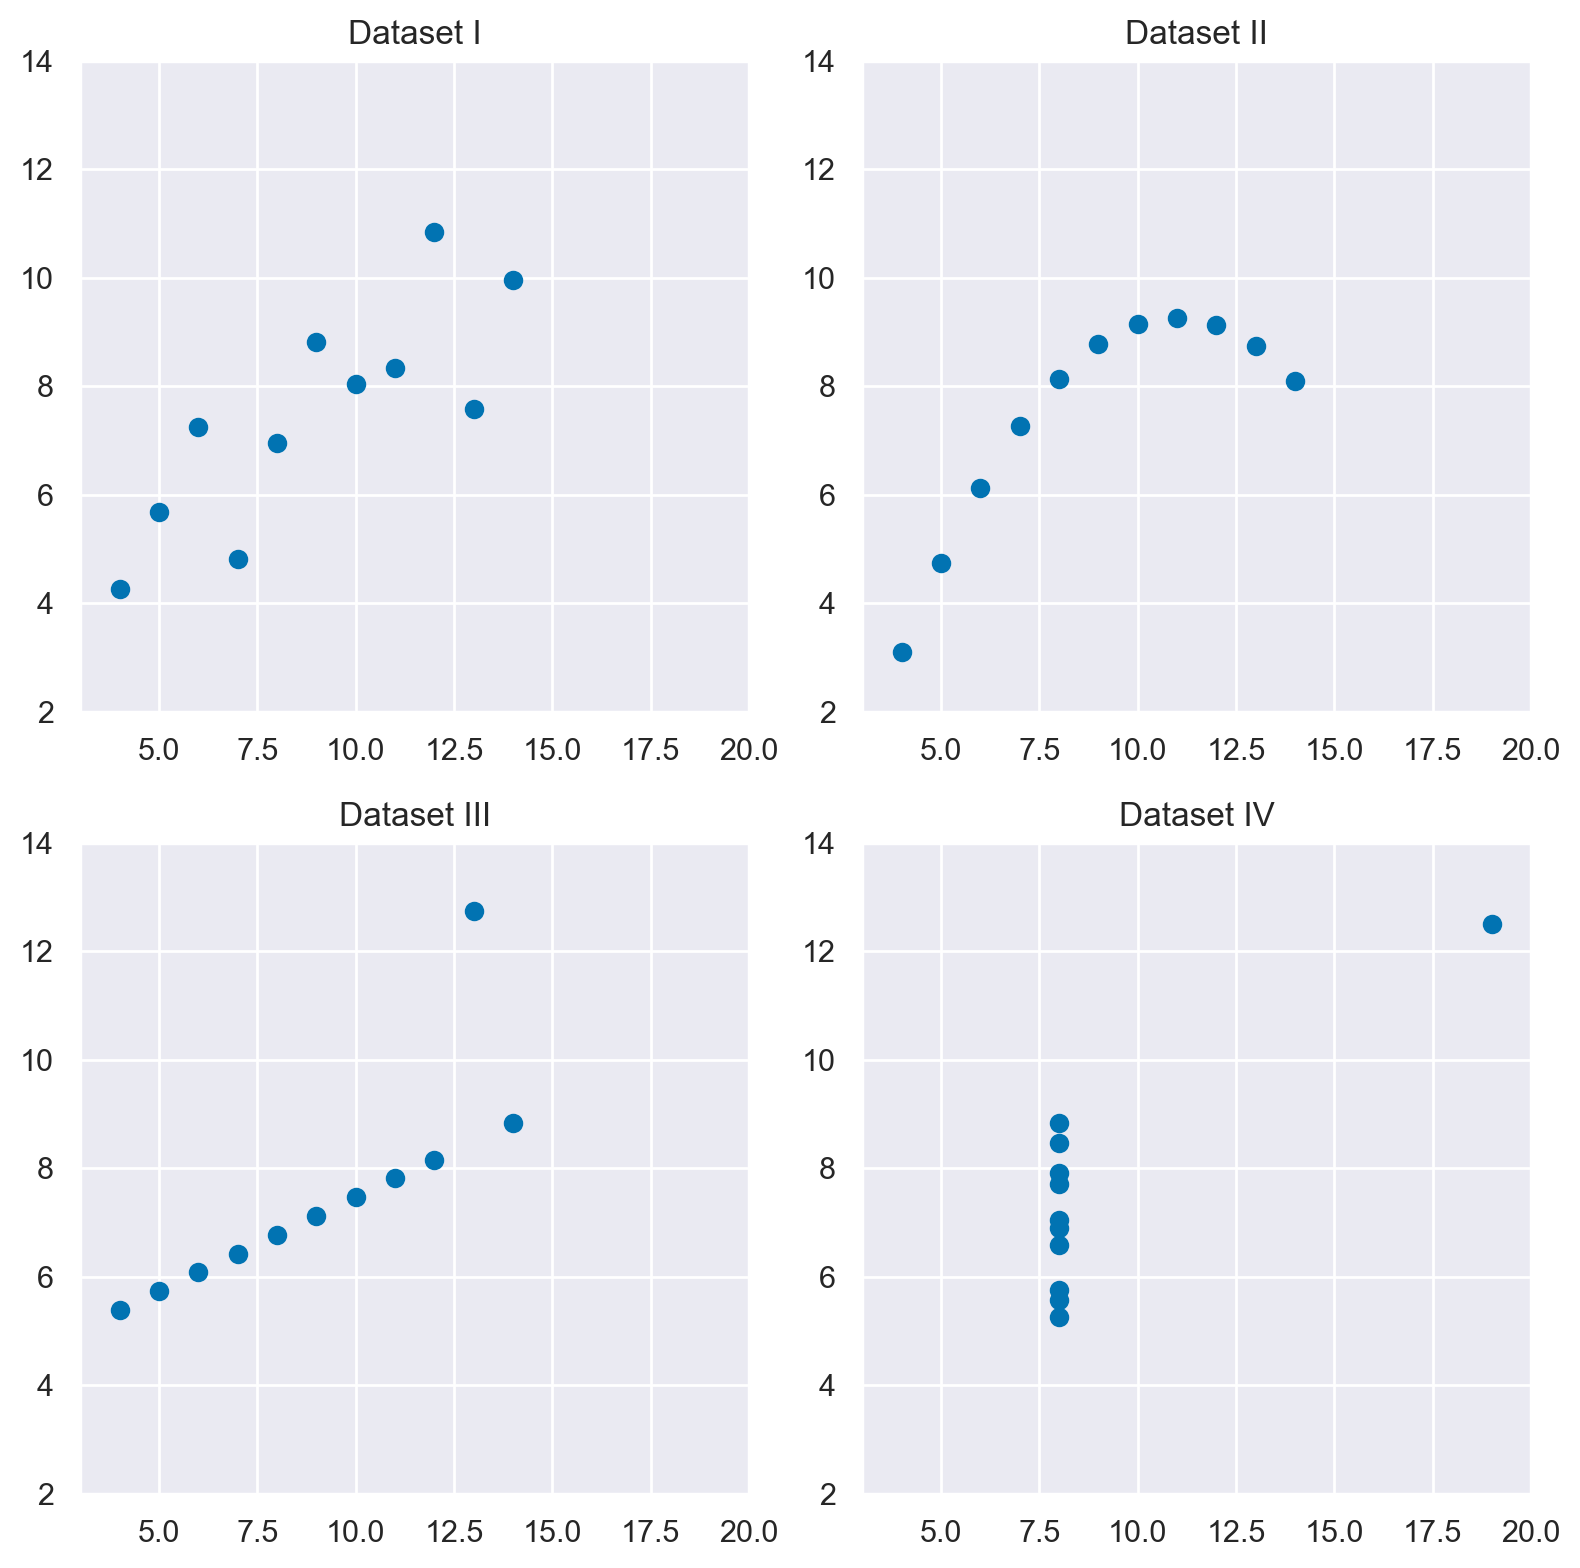

In [25]:
# Caricare il dataset di Anscombe da seaborn
df = sns.load_dataset("anscombe")

# Creare una figura e un array di assi
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Disegnare ogni gruppo in un subplot diverso
for i, dataset in enumerate(df['dataset'].unique()):
    ax = axs[i//2, i%2]
    data = df[df['dataset'] == dataset]
    ax.scatter(data['x'], data['y'])
    ax.set_title(f'Dataset {dataset}')
    ax.set_xlim([3, 20])
    ax.set_ylim([2, 14])

# Aggiustare lo spazio tra i grafici
plt.tight_layout()

# Mostrare la figura
plt.show()


In [26]:
import rpy2
print(rpy2.__version__)

3.5.11


In [27]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr, data
from rpy2.robjects import pandas2ri

utils = importr('utils')

# Specify your CRAN mirror
cran_mirror = 'https://cloud.r-project.org/'

# Install the package without being prompted for a mirror choice
utils.install_packages('quartets', repos=cran_mirror)

R[write to console]: apertura URL 'https://cloud.r-project.org/src/contrib/quartets_0.1.1.tar.gz'



R[write to console]: Content type 'application/x-gzip'


R[write to console]:  length 2236341 bytes (2.1 MB)



R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: 



R[write to console]: downloaded 2.1 MB




* installing *source* package ‘quartets’ ...
** pacchetto ‘quartets’ aperto con successo con controllo somme MD5
** using staged installation
** R
** data
*** moving datasets to lazyload DB


** inst
** byte-compile and prepare package for lazy loading


** help
*** installing help indices
*** copying figures
** building package indices


** testing if installed package can be loaded from temporary location


** testing if installed package can be loaded from final location


** testing if installed package keeps a record of temporary installation path
* DONE (quartets)
R[write to console]: 



R[write to console]: 


R[write to console]: I pacchetti scaricati con il codice sorgente sono in
	‘/private/var/folders/cl/wwjrsxdd5tz7y9jr82nd5hrw0000gn/T/RtmpahMQrS/downloaded_packages’


R[write to console]: 


R[write to console]: 



R[write to console]: Aggiornamento indice HTML dei pacchetti in '.Library'



R[write to console]: Making 'packages.html' ...


R[write to console]:  fatto



<rpy2.rinterface_lib.sexp.NULLType object at 0x17cb62b10> [0]

In [28]:
# Ensure the conversion methods are set up
pandas2ri.activate()
quartets = importr('quartets')
causal_collider = data(quartets).fetch('causal_collider')['causal_collider']
# Convert the R data frame to a Pandas DataFrame
causal_collider_df = pandas2ri.rpy2py(causal_collider)
print(causal_collider_df.head())  

   exposure   outcome  covariate
1  0.486219  1.705884   2.240050
2  0.065271  0.669207   0.924204
3 -1.402070 -1.596622  -0.999364
4 -0.546029 -1.733149  -2.343315
5 -0.401101  0.616867   0.207155


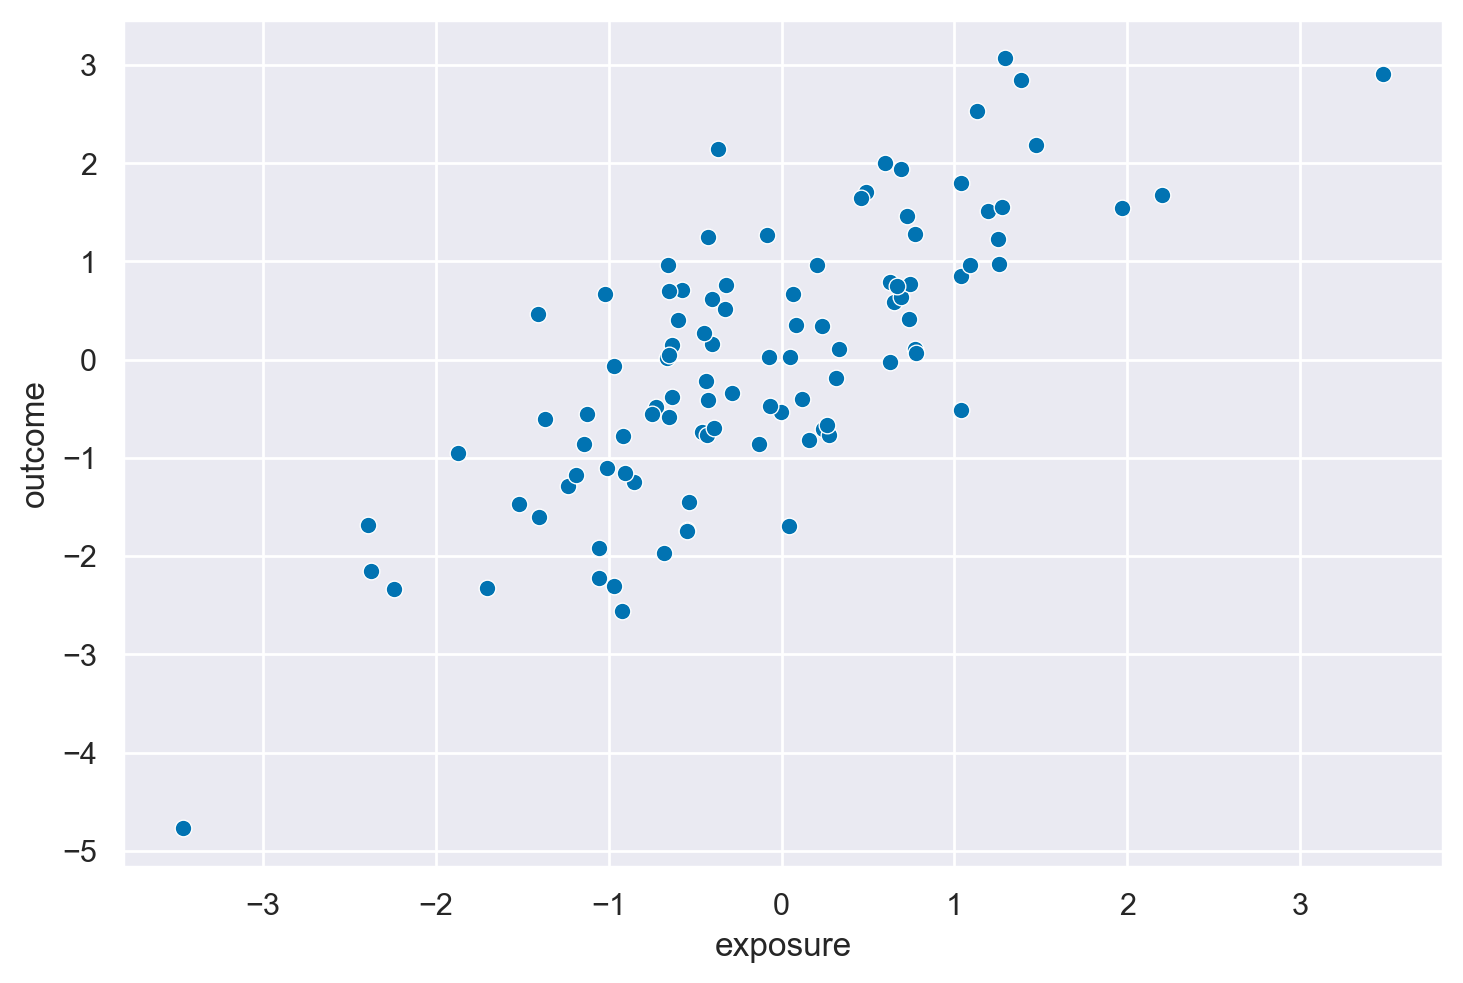

In [29]:
sns.scatterplot(causal_collider_df, x="exposure", y="outcome");

In [30]:
# Calculate the Pearson correlation between 'exposure' and 'outcome'
correlation = causal_collider_df['exposure'].corr(causal_collider_df['outcome'])
print("Correlation between 'exposure' and 'outcome':", correlation)

Correlation between 'exposure' and 'outcome': 0.7686468291983662


In [31]:
mod8 = bmb.Model("outcome ~ exposure", causal_collider_df)
results8 = mod8.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.699787


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1592.39it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1593.47it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1594.88it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1596.36it/s]


Sampling time = 0:00:01.327829


Transforming variables...


Transformation time = 0:00:00.039403


Computing Log Likelihood...


Log Likelihood time = 0:00:00.106116


In [32]:
az.summary(results8, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.13,0.09,-0.04,0.30,0.0,0.0,4416.05,3136.10,1.0
exposure,1.00,0.08,0.84,1.15,0.0,0.0,3711.31,2706.74,1.0
outcome_sigma,0.89,0.07,0.78,1.01,0.0,0.0,3906.49,3036.92,1.0


In [33]:
mod8_bis = bmb.Model("outcome ~ exposure + covariate", causal_collider_df)
results8_bis = mod8_bis.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.564072


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1345.79it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1346.63it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1347.77it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1348.83it/s]


Sampling time = 0:00:01.563387


Transforming variables...


Transformation time = 0:00:00.044651


Computing Log Likelihood...


Log Likelihood time = 0:00:00.099200


In [34]:
az.summary(results8_bis, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.12,0.08,-0.04,0.25,0.0,0.0,3771.17,2437.98,1.0
exposure,0.55,0.10,0.37,0.74,0.0,0.0,2434.33,2655.18,1.0
covariate,0.39,0.06,0.27,0.49,0.0,0.0,2530.92,2360.59,1.0
outcome_sigma,0.75,0.05,0.65,0.85,0.0,0.0,3791.46,2606.90,1.0


In [35]:
causal_confounding = data(quartets).fetch('causal_confounding')['causal_confounding']
# Convert the R data frame to a Pandas DataFrame
causal_confounding_df = pandas2ri.rpy2py(causal_confounding)
print(causal_confounding_df.head())  

   covariate  exposure   outcome
1  -0.622268  0.033178 -0.429296
2   1.136951  0.362695  2.674816
3  -0.237867  0.242180 -0.647128
4   1.529001  1.463265  2.238149
5  -0.154499  0.779136  1.044306


In [36]:
# Calculate the Pearson correlation between 'exposure' and 'outcome'
correlation = causal_confounding_df['exposure'].corr(causal_confounding_df['outcome'])
print("Correlation between 'exposure' and 'outcome':", correlation)

Correlation between 'exposure' and 'outcome': 0.7354068318349989


In [37]:
mod9 = bmb.Model("outcome ~ exposure", causal_confounding_df)
results9 = mod9.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.516215


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1592.72it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1593.96it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1595.44it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1596.72it/s]


Sampling time = 0:00:01.336417


Transforming variables...


Transformation time = 0:00:00.038737


Computing Log Likelihood...


Log Likelihood time = 0:00:00.088277


In [38]:
az.summary(results9, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.01,0.12,-0.23,0.23,0.0,0.0,3490.58,3063.31,1.0
exposure,1.00,0.09,0.83,1.19,0.0,0.0,3652.00,3020.69,1.0
outcome_sigma,1.22,0.09,1.06,1.38,0.0,0.0,3696.52,2750.46,1.0


In [39]:
mod9_bis = bmb.Model("outcome ~ exposure + covariate", causal_confounding_df)
results9_bis = mod9_bis.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.555083


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1338.66it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1339.39it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1340.44it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1341.51it/s]


Sampling time = 0:00:01.569354


Transforming variables...


Transformation time = 0:00:00.043918


Computing Log Likelihood...


Log Likelihood time = 0:00:00.098246


In [40]:
az.summary(results9_bis, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.04,0.10,-0.24,0.15,0.0,0.0,3819.20,2661.75,1.0
exposure,0.50,0.11,0.29,0.69,0.0,0.0,3092.45,2856.73,1.0
covariate,0.97,0.15,0.70,1.25,0.0,0.0,3204.04,2867.98,1.0
outcome_sigma,1.02,0.07,0.88,1.15,0.0,0.0,3629.35,2772.56,1.0


In [41]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Wed Jan 31 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

pymc       : 5.10.3
seaborn    : 0.13.0
numpy      : 1.26.2
bambi      : 0.13.0
graphviz   : 0.20.1
scipy      : 1.11.4
matplotlib : 3.8.2
pandas     : 2.1.4
statsmodels: 0.14.1
networkx   : 3.2.1
arviz      : 0.17.0
rpy2       : 3.5.11

Watermark: 2.4.3

